In [ ]:
!pip install pyspark

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

25/04/01 02:12:38 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 192.168.0.136 instead (on interface enp0s3)
25/04/01 02:12:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/01 02:12:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# Чтение данных из HDFS
#file_path = "http://localhost:9870/nurgaleeva01/hadoop/input/economic_data/TSLA.csv"
file_path = "hdfs://localhost:9000/nurgaleeva01/hadoop/input/economic_data/apple_stock.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

+--------------------+
|     <!DOCTYPE html>|
+--------------------+
|               <html|
|           lang="en"|
|  data-color-mode...|
|  data-a11y-anima...|
|                   >|
+--------------------+
only showing top 5 rows



In [ ]:
pandas_df = df.toPandas()
pandas_df.head()

,<!DOCTYPE html>
0,<html
1,"lang=""en"""
2,"data-color-mode=""auto"" data-light-theme=""lig..."
3,"data-a11y-animated-images=""system"" data-a11y..."
4,>


In [3]:
df = pd.read_csv('/home/devops/apple_stock.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [4]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,199.088202,199.454286,201.093056,197.608373,199.316032,5.832214e+07
std,21.511933,21.321567,21.571427,20.963034,21.365476,3.025771e+07
min,164.585999,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,182.254063,182.852501,184.617504,181.487499,182.777504,4.278855e+07
50%,192.370026,193.084999,194.399994,191.724998,192.989998,5.174865e+07
75%,221.697502,221.697502,224.149994,219.717499,221.635002,6.497460e+07
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Adj Close  252 non-null    float64
 2   Close      252 non-null    float64
 3   High       252 non-null    float64
 4   Low        252 non-null    float64
 5   Open       252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

In [7]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       252 non-null    datetime64[ns, UTC]
 1   Adj Close  252 non-null    float64            
 2   Close      252 non-null    float64            
 3   High       252 non-null    float64            
 4   Low        252 non-null    float64            
 5   Open       252 non-null    float64            
 6   Volume     252 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
df.isna().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [10]:
df['quaters'] = df['Date'].dt.to_period('Q')

<ipython-input-10-8d0db1230fc0>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quaters'] = df['Date'].dt.to_period('Q')


In [11]:
df.groupby('quaters')['Close'].std()

,Close
quaters,
2023Q4,5.409355
2024Q1,7.413214
2024Q2,16.012579
2024Q3,5.758589
2024Q4,3.994362


In [12]:
# filted by year = 2024
df[df['Date']>='2024-01-01'].groupby('quaters')['Close'].std()

,Close
quaters,
2024Q1,7.413214
2024Q2,16.012579
2024Q3,5.758589
2024Q4,3.994362


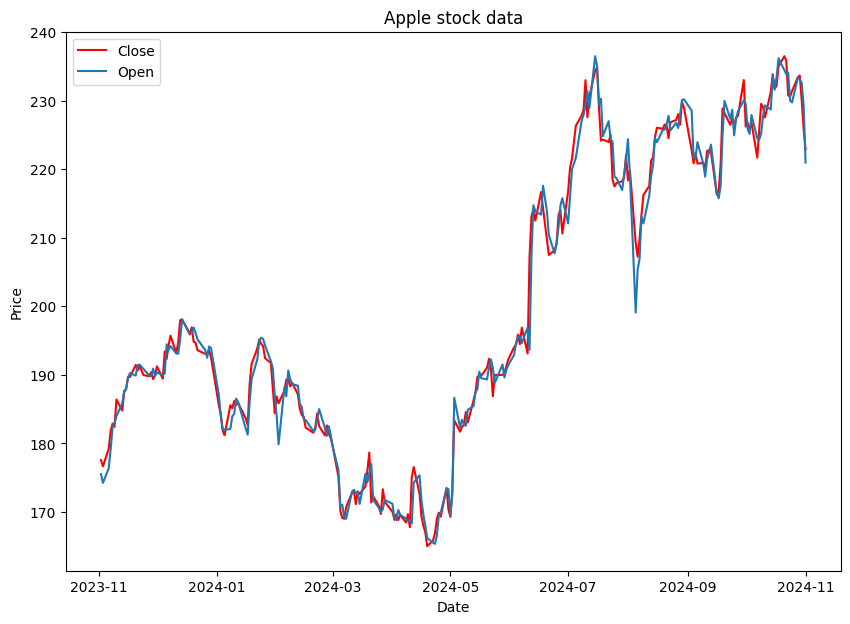

In [44]:
plt.figure(figsize=(10,7))
plt.plot(df['Date'], df['Close'], color = "red", label = "Close")
plt.plot(df['Date'], df['Open'], label = "Open")
plt.title('Apple stock data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Добавлю скользящую среднюю с окном в 30 дней для курса закрытия ('Closed')

In [40]:
df['moving_avg_30_D'] = df.sort_values(by=['Date'], ascending = True)['Close'].rolling(window = 30, min_periods = 1).mean()

In [41]:
df[24:34]

,Date,Adj Close,Close,High,Low,Open,Volume,quaters,moving_avg_30_D
24,2023-12-07 00:00:00+00:00,193.535614,194.270004,195.000000,193.589996,193.630005,47477700,2023Q4,187.607200
25,2023-12-08 00:00:00+00:00,194.970154,195.710007,195.990005,193.669998,194.199997,53377300,2023Q4,187.918846
26,2023-12-11 00:00:00+00:00,192.449707,193.179993,193.490005,191.419998,193.110001,60943700,2023Q4,188.113703
27,2023-12-12 00:00:00+00:00,193.973953,194.710007,194.720001,191.720001,193.080002,52696900,2023Q4,188.349286
28,2023-12-13 00:00:00+00:00,197.211655,197.960007,198.000000,194.850006,195.089996,70404200,2023Q4,188.680690
29,2023-12-14 00:00:00+00:00,197.361084,198.110001,199.619995,196.160004,198.020004,66831600,2023Q4,188.995000
30,2023-12-15 00:00:00+00:00,196.823120,197.570007,198.399994,197.000000,197.529999,128256700,2023Q4,189.661667
31,2023-12-18 00:00:00+00:00,195.149460,195.889999,196.630005,194.389999,196.089996,55751900,2023Q4,190.303000
32,2023-12-19 00:00:00+00:00,196.195511,196.940002,196.949997,195.889999,196.160004,40714100,2023Q4,190.893334
33,2023-12-20 00:00:00+00:00,194.093491,194.830002,197.679993,194.830002,196.899994,52242800,2023Q4,191.327000


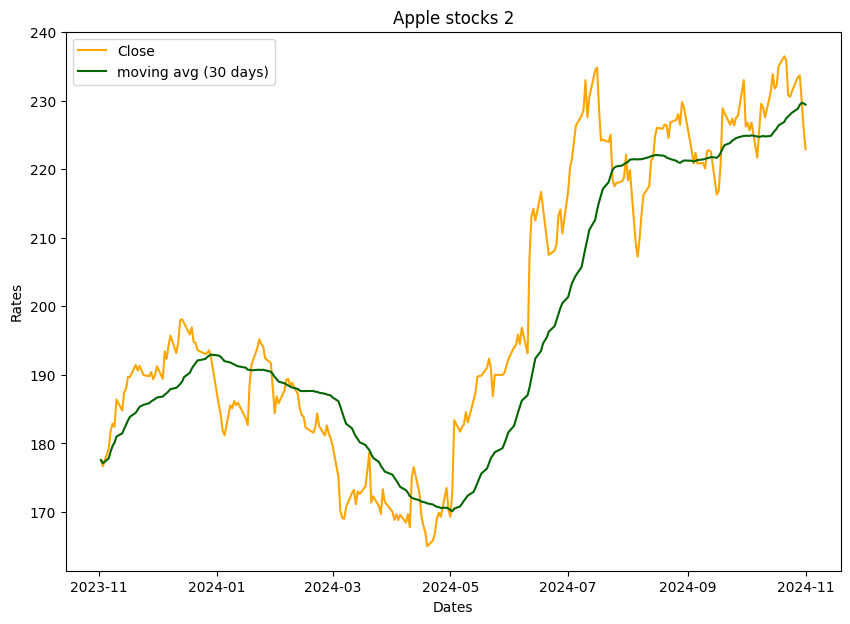

In [43]:
plt.figure(figsize = (10,7))
plt.plot(df['Date'],df['Close'], color = "orange", label = "Close")
plt.plot(df['Date'], df['moving_avg_30_D'], color = "darkgreen", label = "moving avg (30 days)")
plt.title('Apple stocks 2')
plt.xlabel('Dates')
plt.ylabel('Rates')
plt.legend()
plt.show()

In [ ]:
apple_stock_2024 = df[df['Date']>='2024-01-01']

In [ ]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
apple_stock_2024_spark = spark.createDataFrame(apple_stock_2024)


In [ ]:
# Путь в HDFS для сохранения
file_path_hdfs = "hdfs://localhost:9000/nurgaleeva01/hadoop/input/economic_data/apple_stock_2024.csv"

# Сохранение DataFrame в формате CSV в HDFS
apple_stock_2024_spark.write.csv(file_path_hdfs, header=True, mode='overwrite')

AnalysisException: Datasource does not support writing empty or nested empty schemas. Please make sure the data schema has at least one or more column(s).

In [ ]:
#Ошибка org.apache.hadoop.security.AccessControlException:
# Permission denied указывает на то, что текущий пользователь (devops) не имеет прав на запись в указанный каталог HDFS (/user2/hadoop/economic_data).

### Приведенный ниже код не использовала,  т.к. не удалось выгрузить файл с Hadoop в корректном формате

In [ ]:
# Отображение статистики числовых полей
summary_statistics = pandas_df.describe()

# Визуализация ВВП (GDP) по годам для каждой страны
plt.figure(figsize=(12, 8))
for tr in pandas_df['Transaction'].unique():
    tr_data = pandas_df[pandas_df['Transaction'] == tr]
    plt.plot(tr_data['Date'], tr_data['Cost'], marker='o', label=country)

plt.title('TESLA trading')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

summary_statistics

In [ ]:
pandas_df['Country'].unique()

In [ ]:
# Фильтрация данных только для Italy
Italy_data = pandas_df[pandas_df['Country'] == 'Italy']

# Отображение статистики для Italy
Italy_summary_statistics = Italy_data.describe()

# Визуализация ВВП (GDP) для Italy по годам
plt.figure(figsize=(10, 6))
plt.plot(Italy_data['Year'], Italy_data['GDP'], marker='o', linestyle='-', color='b', label='GDP')
plt.title('GDP of Italy Over Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

Italy_summary_statistics

In [ ]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
italy_data_spark = spark.createDataFrame(Italy_data)


In [ ]:
# Путь в HDFS для сохранения
file_path_hdfs = "hdfs://localhost:9000/user2/hadoop/economic_data/Italy_data.csv"

# Сохранение DataFrame в формате CSV в HDFS
italy_data_spark.write.csv(file_path_hdfs, header=True, mode='overwrite')

In [ ]:
#Ошибка org.apache.hadoop.security.AccessControlException:
# Permission denied указывает на то, что текущий пользователь (devops) не имеет прав на запись в указанный каталог HDFS (/user2/hadoop/economic_data).

Изменение прав доступа к каталогу:

Используйте команду hdfs dfs -chmod для изменения прав доступа и разрешения записи для нужного пользователя:
hdfs dfs -chmod 777 /user2/hadoop/economic_data